In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/raw_house_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         4994 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4993 non-null   float64
 12  kitchen_features  4967 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    4999 non-null   object 
 15  HOA               4438 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory 

In [4]:
data.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000,4994.000000,4944.000000,4993.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800,3.829896,3716.366828,2.816143
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362,1.387063,1120.683515,1.192946
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000,1.000000,1100.000000,0.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000,3.000000,3047.000000,2.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000,4.000000,3512.000000,3.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000,4.000000,4130.250000,3.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000,36.000000,22408.000000,30.000000


In [5]:
data.replace(['None', 'none', 'n/a', '',' ' ,'NA','NaN'], np.nan, inplace=True)

In [6]:
print(data.isnull().sum())

MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres            10
taxes                 0
year_built            0
bedrooms              0
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features     33
fireplaces           25
floor_covering        1
HOA                 562
dtype: int64


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         4994 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4993 non-null   float64
 12  kitchen_features  4967 non-null   object 
 13  fireplaces        4975 non-null   object 
 14  floor_covering    4999 non-null   object 
 15  HOA               4438 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory 

In [8]:
print(len(data.columns))

16


In [9]:
data.drop(['latitude', 'longitude'], axis=1, inplace=True)


In [10]:
print(len(data.columns))

14


In [11]:
data['zipcode']=data['zipcode'].astype(str)
data['sqrt_ft']=data['sqrt_ft'].astype(float)
data['garage'] = data['garage'].astype(float)
data['bathrooms'] = data['bathrooms'].astype(float)
data['HOA'] = pd.to_numeric(data['HOA'], errors='coerce').fillna(0).astype(int)
data['fireplaces'] = pd.to_numeric(data['fireplaces'], errors='coerce').fillna(0).astype(int)


In [12]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   object 
 3   lot_acres         4990 non-null   float64
 4   taxes             5000 non-null   float64
 5   year_built        5000 non-null   int64  
 6   bedrooms          5000 non-null   int64  
 7   bathrooms         4994 non-null   float64
 8   sqrt_ft           4944 non-null   float64
 9   garage            4993 non-null   float64
 10  kitchen_features  4967 non-null   object 
 11  fireplaces        5000 non-null   int64  
 12  floor_covering    4999 non-null   object 
 13  HOA               5000 non-null   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 547.0+ KB


In [13]:
print(data.isnull().sum())

MLS                  0
sold_price           0
zipcode              0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            6
sqrt_ft             56
garage               7
kitchen_features    33
fireplaces           0
floor_covering       1
HOA                  0
dtype: int64


In [14]:
'''data['garage'].fillna(data['garage'].median(),inplace=True)
data['bathrooms'].fillna(data['bathrooms'].median(),inplace=True)
data['lot_acres'].fillna(data['lot_acres'].median(),inplace=True)
data['sqrt_ft'].fillna(data['sqrt_ft'].median(),inplace=True)'''

'''data['kitchen_features'].fillna(data['kitchen_features'].mode()[0], inplace=True)
data['floor_covering'].fillna(data['floor_covering'].mode()[0], inplace=True)'''



"data['kitchen_features'].fillna(data['kitchen_features'].mode()[0], inplace=True)\ndata['floor_covering'].fillna(data['floor_covering'].mode()[0], inplace=True)"

In [15]:
for col in ['garage', 'bathrooms', 'sqrt_ft', 'lot_acres']:
    data[col].fillna(data[col].median(), inplace=True)

for col in ['kitchen_features', 'floor_covering']:
    data[col].fillna(data[col].mode()[0], inplace=True)


data['HOA'] = pd.to_numeric(data['HOA'], errors='coerce').fillna(0).astype(int)


<ipython-input-15-45ceb42cfdc9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
<ipython-input-15-45ceb42cfdc9>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [17]:
data.to_csv("cleaned_house_data.csv", index=False)


In [18]:
print(data.isnull().sum())

MLS                 0
sold_price          0
zipcode             0
lot_acres           0
taxes               0
year_built          0
bedrooms            0
bathrooms           0
sqrt_ft             0
garage              0
kitchen_features    0
fireplaces          0
floor_covering      0
HOA                 0
dtype: int64


In [19]:
vdata=data.copy()

In [20]:
data.describe().applymap('{:.2f}'.format)

<ipython-input-20-f62ebc02ea2b>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data.describe().applymap('{:.2f}'.format)


,MLS,sold_price,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,21270699.22,774626.20,4.65,9402.83,1992.33,3.93,3.83,3714.08,2.82,1.88,73.19
std,2398507.68,318555.61,51.63,172938.53,65.49,1.25,1.39,1114.60,1.19,1.14,90.81
min,3042851.00,169000.00,0.00,0.00,0.00,1.00,1.00,1100.00,0.00,0.00,0.00
25%,21407176.50,585000.00,0.58,4803.61,1987.00,3.00,3.00,3051.00,2.00,1.00,0.00
50%,21614686.50,675000.00,0.99,6223.76,1999.00,4.00,4.00,3512.00,3.00,2.00,44.00
75%,21804801.75,835000.00,1.75,8082.83,2006.00,4.00,4.00,4120.00,3.00,3.00,122.00
max,21928565.00,5300000.00,2154.00,12215075.00,2019.00,36.00,36.00,22408.00,30.00,9.00,925.00


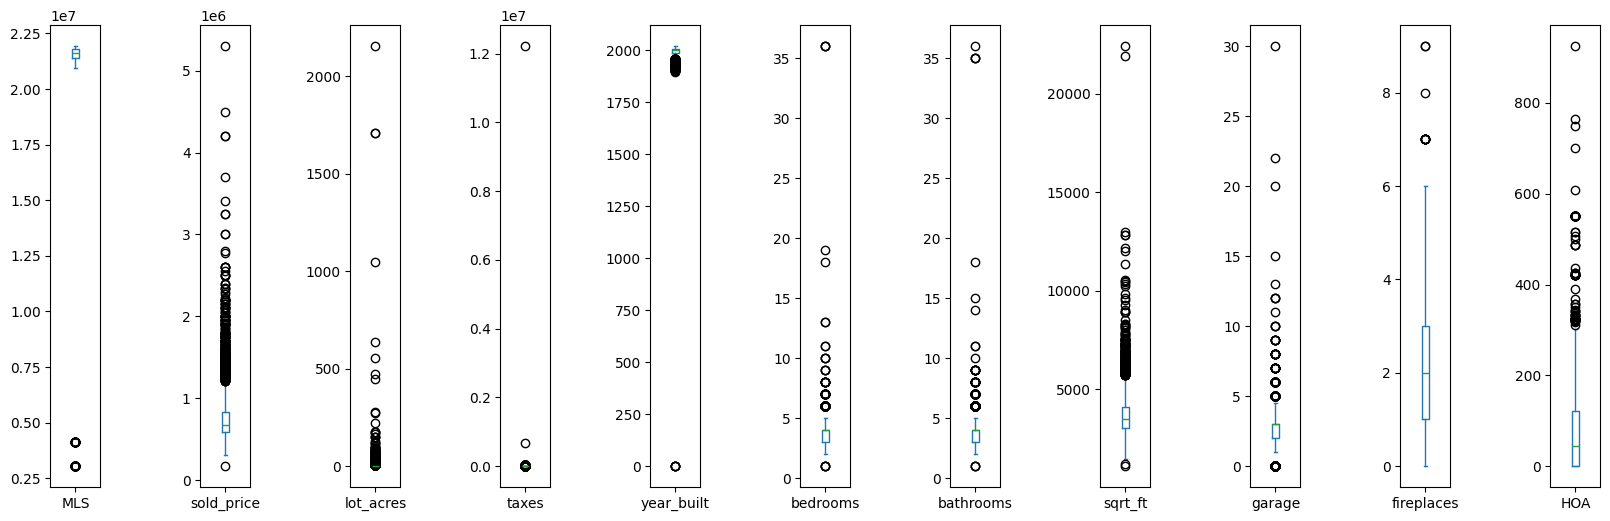

In [21]:
data.plot(
    kind='box',
    subplots=True,
    sharey=False,  #Allow each subplot to have its own y-axis scale
    figsize=(20, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=2)
plt.show()

#Finding Outliers

In [ ]:

cols_to_check = list(data.select_dtypes(include=['number']).columns)


for col in cols_to_check:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col} → Outliers: {outliers.shape[0]}")



MLS → Outliers: 88
sold_price → Outliers: 395
zipcode → Outliers: 650
longitude → Outliers: 109
latitude → Outliers: 342
lot_acres → Outliers: 580
taxes → Outliers: 277
year_built → Outliers: 246
bedrooms → Outliers: 173
bathrooms → Outliers: 305
sqrt_ft → Outliers: 238
garage → Outliers: 378
HOA → Outliers: 98


#Replacing Outliers

In [ ]:

for col in cols_to_check:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply clipping to limit outliers
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

    print(f"{col} clipped between {lower_bound:.2f} and {upper_bound:.2f}")


MLS clipped between 20810738.62 and 22401239.62
sold_price clipped between 210000.00 and 1210000.00
lot_acres clipped between -1.17 and 3.50
taxes clipped between -115.23 and 13001.67
year_built clipped between 1958.50 and 2034.50
bedrooms clipped between 1.50 and 5.50
bathrooms clipped between 1.50 and 5.50
sqrt_ft clipped between 1447.50 and 5723.50
garage clipped between 0.50 and 4.50
fireplaces clipped between -2.00 and 6.00
HOA clipped between -183.00 and 305.00


In [ ]:
#Verifying that cliping worked
cols_to_check = ['sold_price', 'sqrt_ft', 'lot_acres', 'taxes', 'bathrooms', 'bedrooms', 'garage']


for col in cols_to_check:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col} → Outliers: {outliers.shape[0]}")

sold_price → Outliers: 0
sqrt_ft → Outliers: 0
lot_acres → Outliers: 0
taxes → Outliers: 0
bathrooms → Outliers: 0
bedrooms → Outliers: 0
garage → Outliers: 0


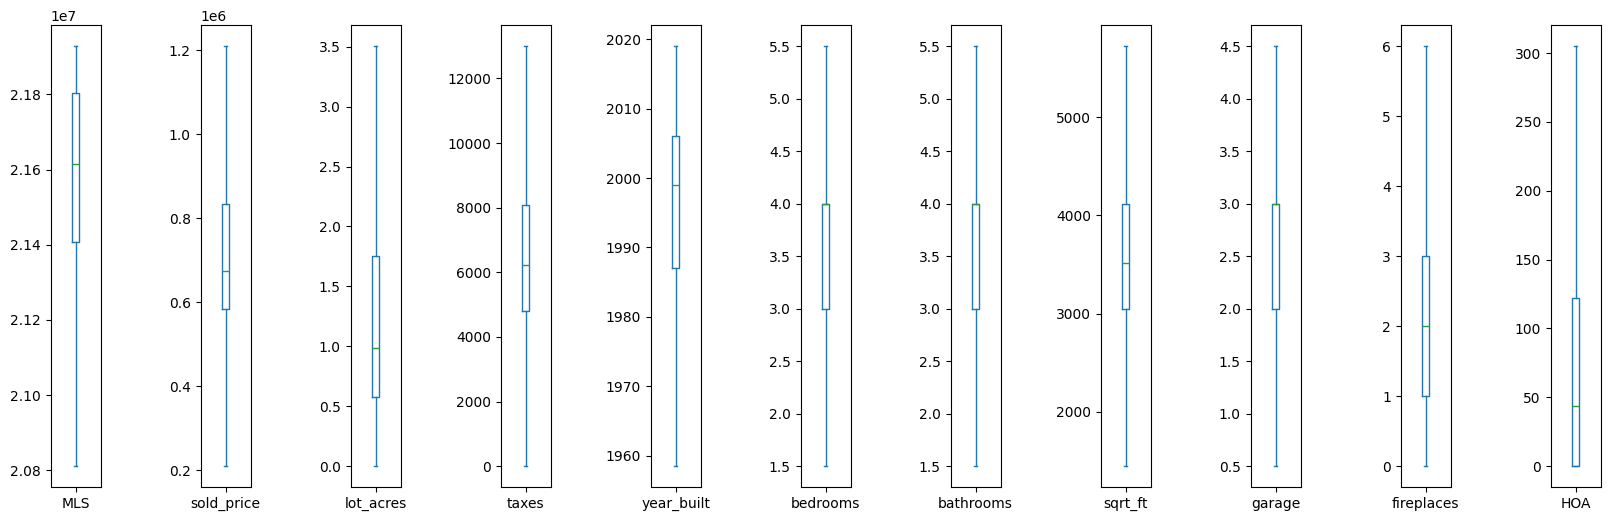

In [ ]:
data.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(20, 6)
)

plt.subplots_adjust(wspace=2)
plt.show()


In [23]:
data.to_csv("cleaned_house_data.csv", index=False)


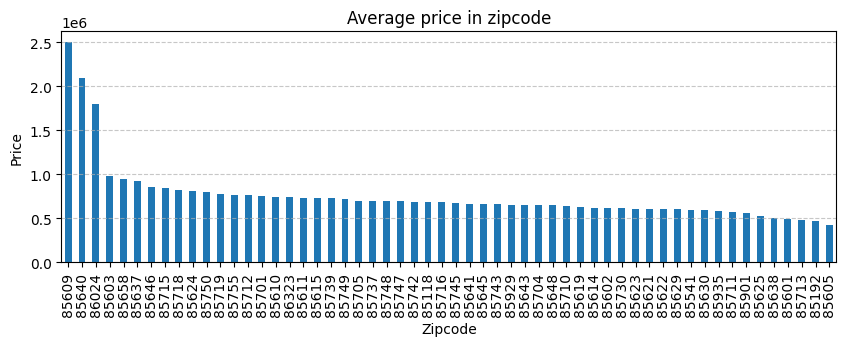

In [ ]:
pro_vdata=vdata[['sold_price','zipcode']].groupby(['zipcode'])['sold_price'].mean().reset_index()

pro_vdata = pro_vdata.sort_values(by='sold_price', ascending=False)

pro_vdata.plot(kind='bar',x='zipcode',y='sold_price',legend=False,figsize=(10, 3))

plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.title('Average price in zipcode')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [24]:
print(data.columns)

Index(['MLS', 'sold_price', 'zipcode', 'lot_acres', 'taxes', 'year_built',
       'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'kitchen_features',
       'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')


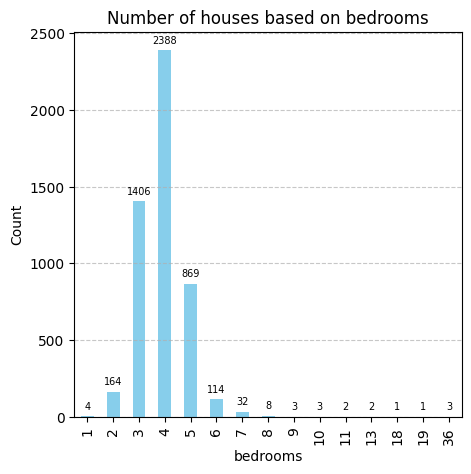

In [25]:
# Create a bar plot
pro_vdata=vdata[['bedrooms','zipcode']].groupby(['bedrooms']).count().reset_index()
pro_vdata.columns = ['bedrooms','count']
ax = pro_vdata.plot(x='bedrooms', y='count', kind='bar', legend=False, color='skyblue', figsize=(5,5))

for i, v in enumerate(pro_vdata['count']):
    ax.annotate(str(v), xy=(i, v), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=7, color='black')

plt.xlabel('bedrooms')
plt.ylabel('Count')
plt.title('Number of houses based on bedrooms')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()







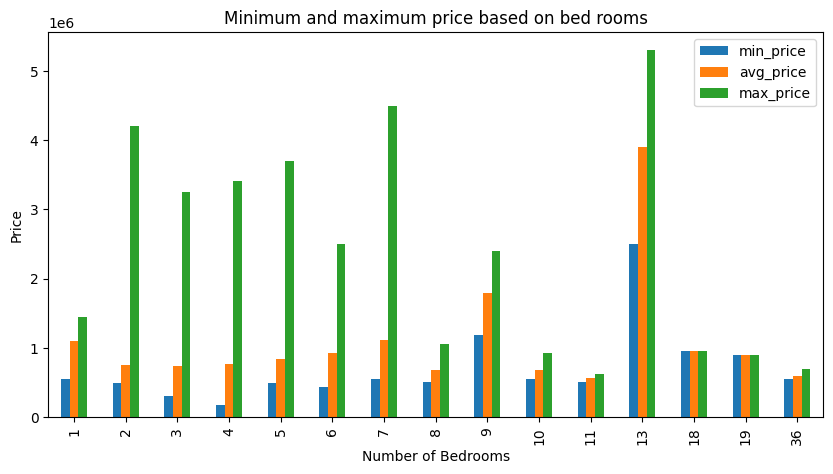

In [26]:
pro_vdata=vdata[['sold_price','bedrooms']].groupby(['bedrooms']).agg(min_price=('sold_price', 'min'), avg_price =('sold_price','mean'),max_price=('sold_price', 'max')).reset_index()

pro_vdata = pro_vdata.sort_values(by='bedrooms', ascending=True)

pro_vdata.plot(x='bedrooms',kind='bar',stacked=False,figsize = (10,5),
        title='Minimum and maximum price based on bed rooms')

plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')

plt.show()


<ipython-input-27-4afd960449e5>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pro_vdata = pro_vdata.groupby('year_range')['sold_price'].mean().reset_index()


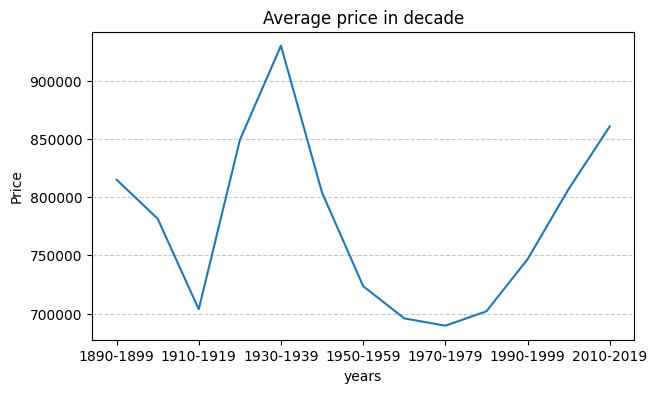

In [27]:
pro_vdata=vdata[['year_built','sold_price']]

pro_vdata = pro_vdata[pro_vdata['year_built'] != 0]

bins = [1879,1899,1909,1919,1929,1939,1949,1959,1969,1979,1989,1999,2009,2019]
labels = ['1890-1899','1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019']


pro_vdata['year_range'] = pd.cut(pro_vdata['year_built'], bins=bins, labels=labels, right=True)


pro_vdata = pro_vdata.groupby('year_range')['sold_price'].mean().reset_index()


pro_vdata.plot(kind='line',x='year_range',y='sold_price',legend=False,figsize=(7, 4))

plt.xlabel('years')
plt.ylabel('Price')
plt.title('Average price in decade')

plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.show()



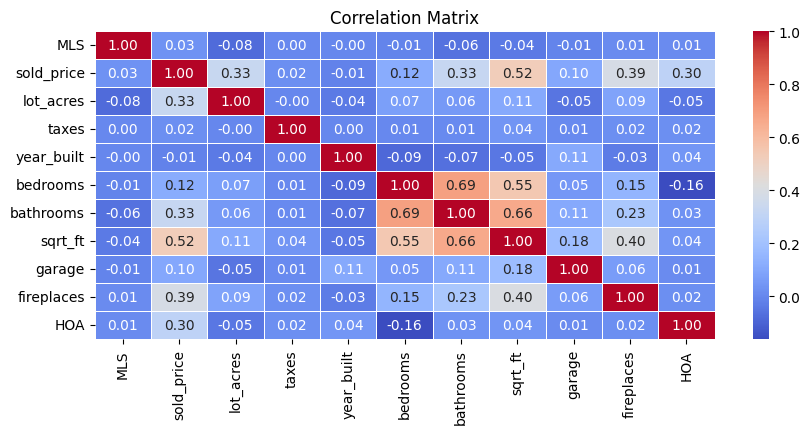

In [28]:
corr_matrix = vdata.select_dtypes(include=['number']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('Correlation Matrix')
plt.show()

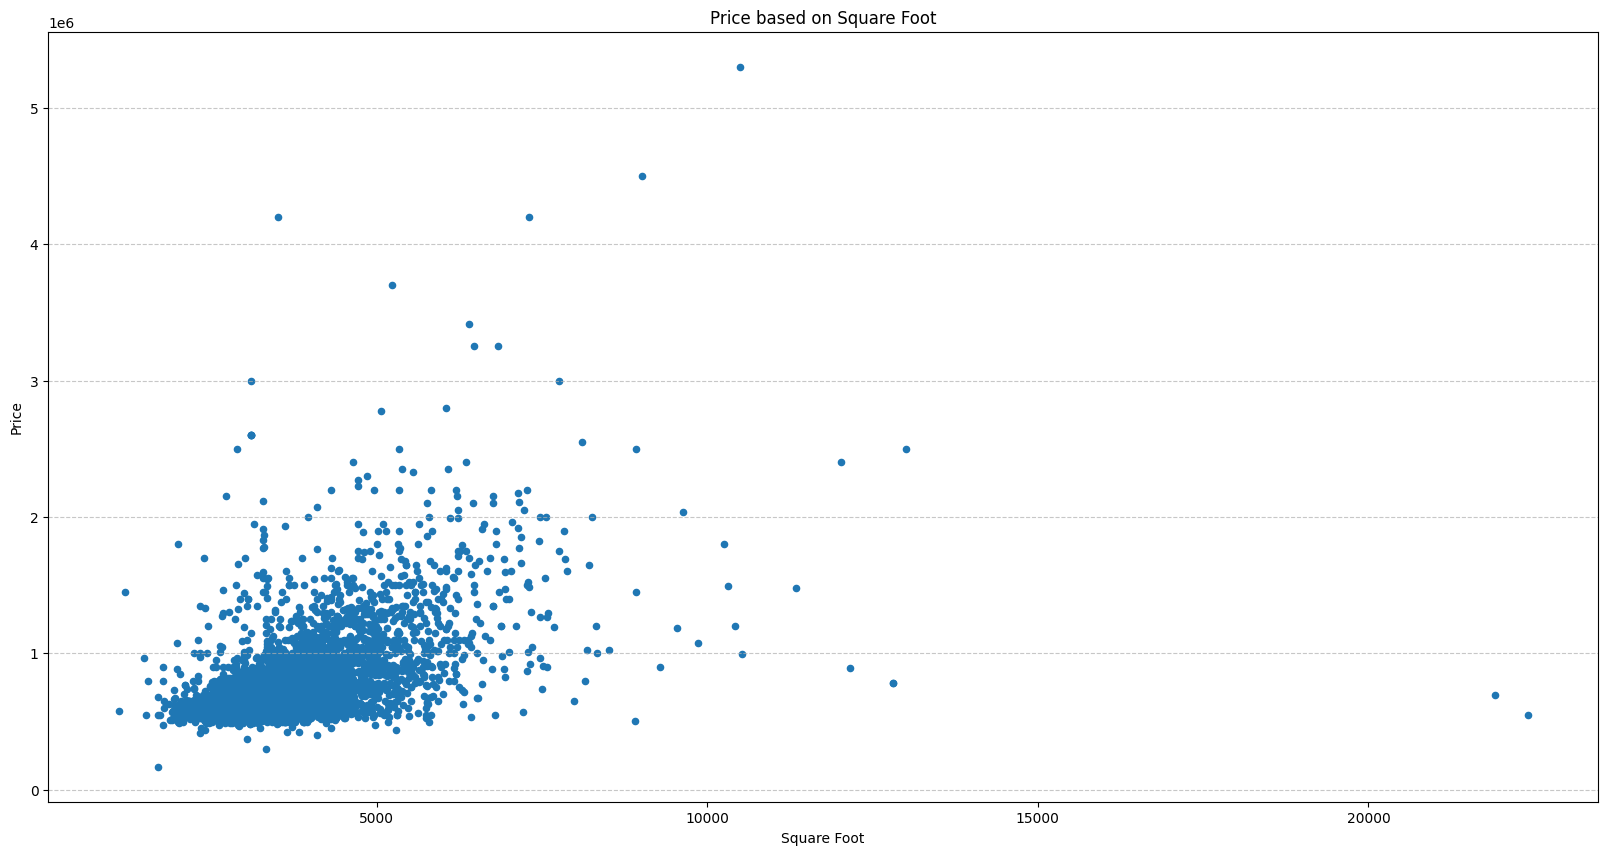

In [29]:
pro_vdata=vdata[['sqrt_ft','sold_price']]

pro_vdata = pro_vdata.sort_values(by='sqrt_ft', ascending=True)

pro_vdata.plot(kind='scatter',x='sqrt_ft',y='sold_price',legend=False,figsize=(20, 10))

plt.xlabel('Square Foot')
plt.ylabel('Price')
plt.title('Price based on Square Foot')

plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.show()


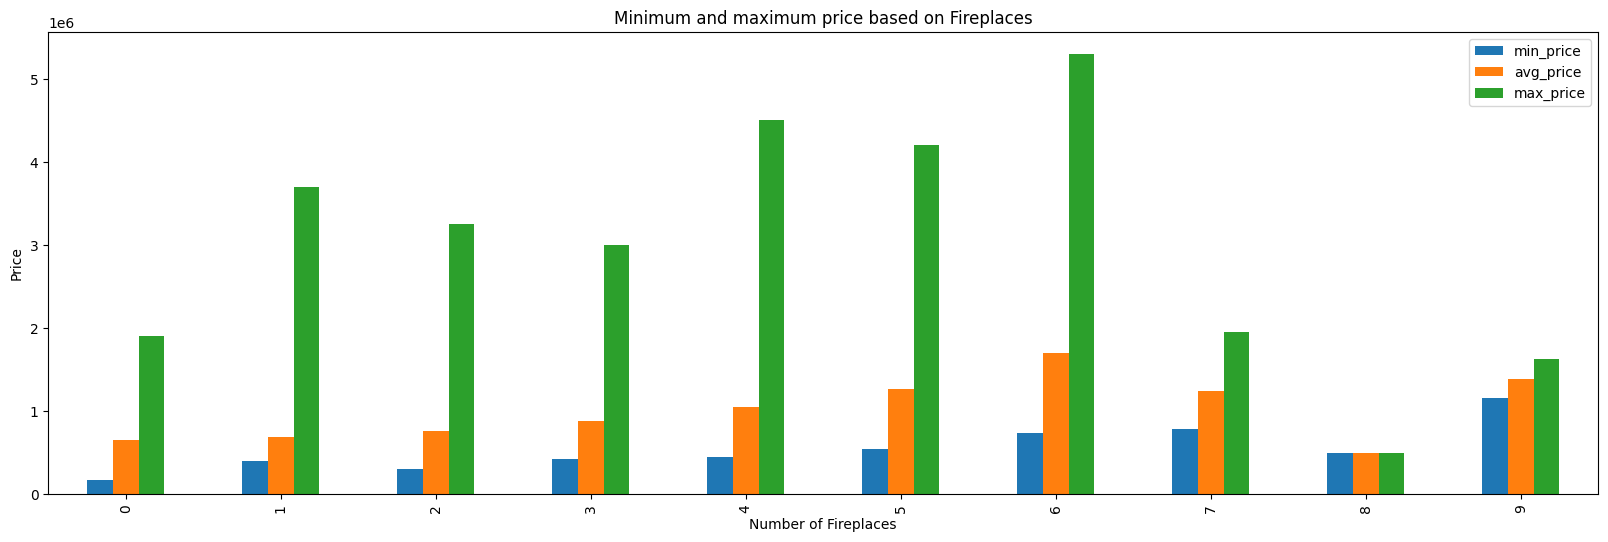

In [30]:
pro_vdata=vdata[['sold_price','fireplaces']].groupby(['fireplaces']).agg(min_price=('sold_price', 'min'),avg_price =('sold_price','mean'), max_price=('sold_price', 'max')).reset_index()

pro_vdata = pro_vdata.sort_values(by='fireplaces', ascending=True)

pro_vdata.plot(x='fireplaces', kind='bar',stacked=False,figsize = (20,6),
        title='Minimum and maximum price based on Fireplaces')

plt.xlabel('Number of Fireplaces')
plt.ylabel('Price')

plt.show()

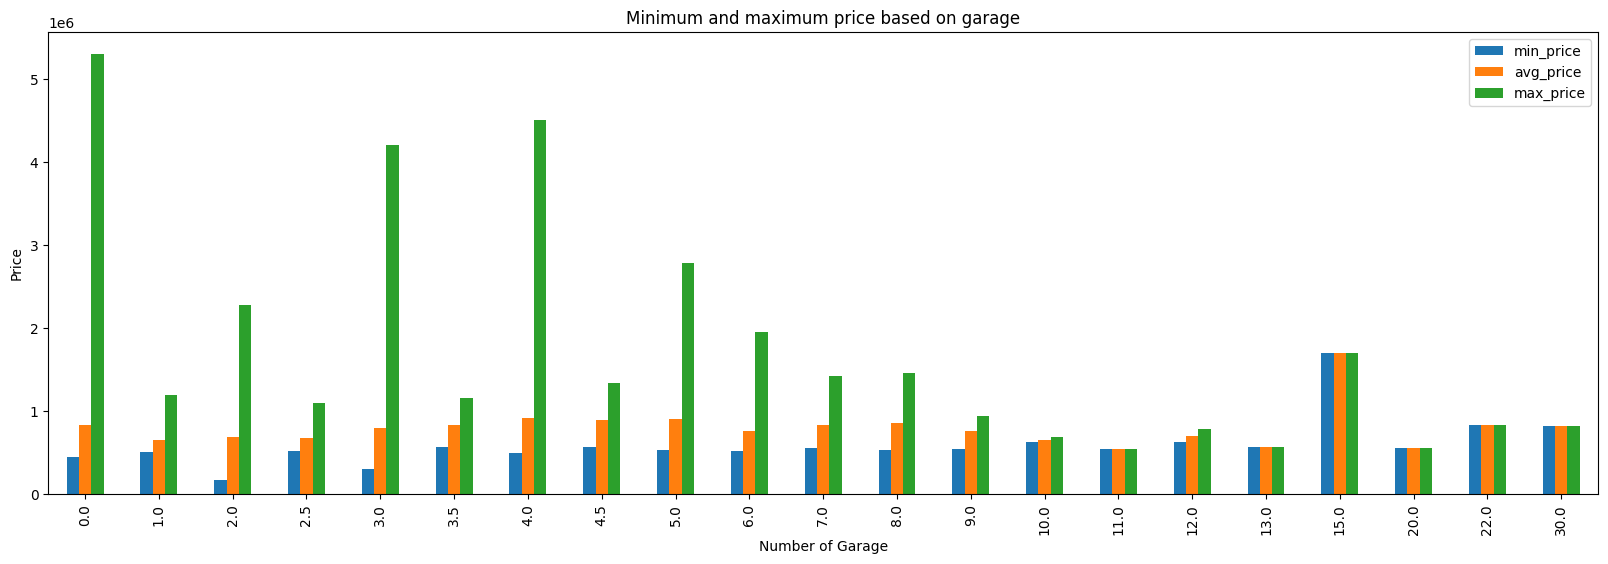

In [31]:
pro_vdata=vdata[['sold_price','garage']].groupby(['garage']).agg(min_price=('sold_price', 'min'),avg_price =('sold_price','mean'), max_price=('sold_price', 'max')).reset_index()

pro_vdata = pro_vdata.sort_values(by='garage', ascending=True)

pro_vdata.plot(x='garage', kind='bar',stacked=False,figsize = (20,6),
        title='Minimum and maximum price based on garage')

plt.xlabel('Number of Garage')
plt.ylabel('Price')

plt.show()